In [59]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [60]:
# Load both train and test datasets
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
train_df.head()

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [61]:
test_df.head()

,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival


In [62]:
print("Train df:", train_df.shape)
print("Test df:", test_df.shape)

Train df: (10003, 2)
Test df: (3080, 2)


In [63]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

text        0
category    0
dtype: int64
text        0
category    0
dtype: int64


In [64]:
# Find the top 10 labels in the dataset
train_df['category'].value_counts().head(10)

category
card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
transaction_charged_twice                           175
declined_cash_withdrawal                            173
transfer_fee_charged                                172
transfer_not_received_by_recipient                  171
balance_not_updated_after_bank_transfer             171
Name: count, dtype: int64

In [65]:
# Find the last 10 labels in the dataset
train_df['category'].value_counts().tail(10)

category
get_disposable_virtual_card    97
top_up_limits                  97
receiving_money                95
atm_support                    87
compromised_card               86
lost_or_stolen_card            82
card_swallowed                 61
card_acceptance                59
virtual_card_not_working       41
contactless_not_working        35
Name: count, dtype: int64

In [66]:
train_df['category'].unique()

array(['card_arrival', 'card_linking', 'exchange_rate',
       'card_payment_wrong_exchange_rate', 'extra_charge_on_statement',
       'pending_cash_withdrawal', 'fiat_currency_support',
       'card_delivery_estimate', 'automatic_top_up', 'card_not_working',
       'exchange_via_app', 'lost_or_stolen_card', 'age_limit',
       'pin_blocked', 'contactless_not_working',
       'top_up_by_bank_transfer_charge', 'pending_top_up',
       'cancel_transfer', 'top_up_limits',
       'wrong_amount_of_cash_received', 'card_payment_fee_charged',
       'transfer_not_received_by_recipient',
       'supported_cards_and_currencies', 'getting_virtual_card',
       'card_acceptance', 'top_up_reverted',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'card_payment_not_recognised', 'edit_personal_details',
       'why_verify_identity', 'unable_to_verify_identity',
       'get_physical_card', 'visa_or_mastercard', 'topping_up_by_card',
       'disposable_card_limits', 'compromised_card

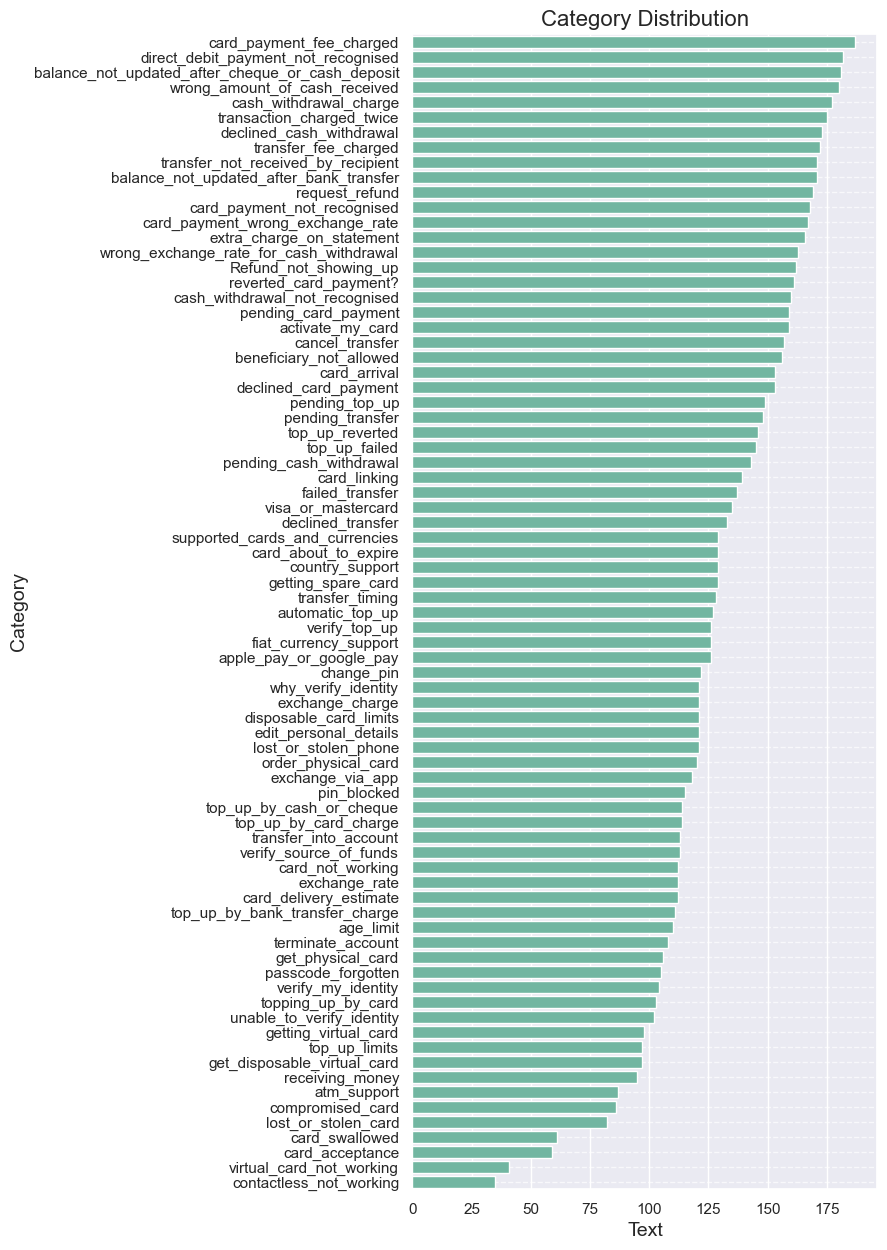

In [67]:
get_label_counts = train_df.groupby('category').agg('count').sort_values(by='text', ascending=False)

# Initialize matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_palette('Set2')
sns.barplot(data=get_label_counts, x='text', y='category')

ax.set_title("Category Distribution", fontsize=16)
ax.set_xlabel("Text", fontsize=14)
ax.set_ylabel('Category', fontsize=14)

ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.show()

In [68]:
# The categories are grouped together, so we're going to shuffle the training dataset 
train_df = train_df.sample(frac=1)      # shuffle the training data and return all rows
train_df.head()

,text,category
3753,How do I modify my account details?,edit_personal_details
9196,I want to use my card. How do I activate it?,activate_my_card
901,What currencies do you offer?,fiat_currency_support
5965,My card payment won't work.,declined_card_payment
8009,I want to deposit my check to top up my account,top_up_by_cash_or_cheque


In [77]:
# Convert the text columns that we're going to use to train and test the model into numpy arrays for efficiency 
train_data = train_df['text'].to_numpy()
test_data = test_df['text'].to_numpy()
print(type(train_data))
print(type(test_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [78]:
print(train_data)
print(test_data)

['How do I modify my account details?'
 'I want to use my card. How do I activate it?'
 'What currencies do you offer?' ... 'How do I cancel a transfer?'
 'Am I allowed to change my PIN anywhere?'
 'Why would my card payment be reverted?']
['How do I locate my card?'
 'I still have not received my new card, I ordered over a week ago.'
 'I ordered a card but it has not arrived. Help please!' ...
 'What countries do you do business in?'
 'What are the countries you operate in.'
 'Can the card be mailed and used in Europe?']


In [79]:
vocab_size = 5000
oov_tok = '<OOV>'

# Tokenize words to integers
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

# Convert each text into a sequence of integers
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [80]:
print(train_sequences)

[[13, 9, 2, 747, 3, 17, 182], [2, 82, 4, 53, 3, 7, 13, 9, 2, 176, 10], [14, 112, 9, 18, 423], [3, 7, 33, 224, 99], [2, 82, 4, 183, 3, 118, 4, 23, 16, 3, 17], [13, 60, 9, 2, 277, 12, 5, 22, 4, 66], [6, 42, 68, 18, 43, 96, 8, 594, 31, 101, 40, 6, 721, 620, 42, 68], [11, 2, 63, 53, 3, 17, 322, 409, 3, 103], [2, 95, 44, 248, 151, 12, 5, 62], [300, 50, 323, 156, 19, 3, 37, 79, 8, 63, 54, 15], [131, 95, 5, 1243, 1508, 29, 3, 7], [13, 60, 73, 5, 22, 62, 66], [13, 73, 92, 236, 24, 20], [8, 10, 129, 4, 109, 3, 65], [132, 110, 29, 2, 21, 88, 306, 44, 12, 34, 47, 79, 131, 255, 410, 31, 72, 160, 19, 160, 108, 572, 50, 264], [46, 52, 3, 22, 595], [15, 8, 23, 16, 54], [13, 11, 2, 788, 3, 282, 41, 486, 283, 112], [9, 2, 25, 4, 93, 4, 34, 573, 123, 4, 109, 3, 65], [3, 7, 33, 192, 6, 70, 42, 68], [2, 58, 28, 25, 6, 173, 42, 68, 284, 4, 3, 1084, 38, 970, 84, 37], [45, 89, 24, 13, 6, 42, 68, 8, 971, 2, 21, 722, 142, 20, 12, 6, 62], [2, 25, 5, 329, 194, 7, 39, 6, 179, 52, 18, 66, 10], [2, 301, 4, 75, 113,

In [81]:
print(test_sequences)

[[13, 9, 2, 789, 3, 7], [2, 63, 25, 28, 107, 3, 67, 7, 2, 354, 310, 5, 240, 125], [2, 354, 5, 7, 35, 10, 56, 28, 276, 59, 45], [8, 30, 5, 174, 4, 75, 46, 3, 7, 52, 369], [3, 7, 56, 28, 276, 90], [46, 52, 2, 32, 3, 7], [9, 18, 75, 55, 30, 8, 5, 642, 208, 12, 6, 67, 7, 18, 148, 24], [2, 25, 28, 107, 3, 7], [63, 209, 29, 26, 7], [8, 10, 669, 4, 25, 4, 277, 310, 5, 240, 12, 3, 67, 7], [13, 9, 2, 368, 3, 7], [13, 60, 73, 5, 7, 370, 66], [2, 63, 74, 25, 3, 7, 163, 469, 307, 14, 116, 2, 9], [63, 209, 29, 3, 67, 7], [2, 49, 63, 209, 12, 3, 7, 163, 339, 240, 8, 31, 664], [2, 25, 50, 209, 380, 165, 580, 12, 3, 123, 7, 154, 18, 489, 252, 29, 46, 10, 52, 369], [131, 50, 209, 380, 165, 580, 12, 3, 7], [15, 122, 3, 7, 50, 330], [57, 8, 3, 67, 7, 2, 25, 50, 209, 5, 240], [3, 7, 63, 122, 276, 163, 469, 307, 8, 10, 166], [2, 58, 28, 32, 3, 7, 90, 8, 10, 166], [405, 38, 6, 7, 2, 354], [13, 60, 116, 3, 67, 7, 66, 4, 369], [2, 354, 3, 7, 469, 307, 125, 19, 10, 63, 136, 210, 14, 9, 2, 9], [3, 7, 56, 28, 27

In [82]:
# Pad sequences so both the training sequence and test sequence are the same length
max_length = 50
truncate = 'post'
padding='post'

x_train = pad_sequences(train_sequences, maxlen=max_length, padding=padding, truncating=truncate)
x_test = pad_sequences(test_sequences, maxlen=max_length, padding=padding, truncating=truncate)

In [83]:
print(x_train)

[[ 13   9   2 ...   0   0   0]
 [  2  82   4 ...   0   0   0]
 [ 14 112   9 ...   0   0   0]
 ...
 [ 13   9   2 ...   0   0   0]
 [ 49   2 324 ...   0   0   0]
 [ 15  64   3 ...   0   0   0]]


In [84]:
print(x_test)

[[ 13   9   2 ...   0   0   0]
 [  2  63  25 ...   0   0   0]
 [  2 354   5 ...   0   0   0]
 ...
 [ 14 280   9 ...   0   0   0]
 [ 14  43   6 ...   0   0   0]
 [ 11   6   7 ...   0   0   0]]


In [88]:
# Convert text labels into numerical values
train_labels = pd.Categorical(train_df['category']).codes
test_labels = pd.Categorical(test_df['category']).codes

In [89]:
# Reshape the arrays into 2d arrays
y_train = train_labels.reshape((train_labels.shape[0],1))
y_test = test_labels.reshape((test_labels.shape[0],1))

In [91]:
print(y_train.shape)
print(y_test.shape)

(10003, 1)
(3080, 1)


In [92]:
# Set aside 10% of training data for validation
partial_x_train = x_train[:9000]
partial_y_train = y_train[:9000]

x_val = x_train[9000:]
y_val = y_train[9000:]

In [94]:
print(len(partial_x_train))
print(len(x_val))

9000
1003


In [95]:
# Create a model with an Embedding layer, LSTM, and 2 dense layers
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),       # transform data into dense vectors, easier to work with for model
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),     # utilize Long short-term memory 
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax'),            # 77 neurons, 1 for each unique class, use softmax to return a probability 
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 77)                5005      
                                                                 
Total params: 399,309
Trainable params: 399,309
Non-trainable params: 0
_________________________________________________________________


2024-09-19 15:22:32.248488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-19 15:22:32.249904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-19 15:22:32.250376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

num_epochs = 20

history = model.fit(partial_x_train, partial_y_train, epochs=num_epochs, validation_data=(x_val, y_val), verbose=2)

Epoch 1/20


2024-09-19 15:27:38.352207: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-09-19 15:27:38.538630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-19 15:27:38.539379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-19 15:27:38.540059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

282/282 - 6s - loss: 3.7485 - accuracy: 0.0868 - val_loss: 2.7099 - val_accuracy: 0.2642 - 6s/epoch - 20ms/step
Epoch 2/20
282/282 - 4s - loss: 2.0477 - accuracy: 0.4188 - val_loss: 1.6499 - val_accuracy: 0.5344 - 4s/epoch - 14ms/step
Epoch 3/20
282/282 - 4s - loss: 1.2567 - accuracy: 0.6402 - val_loss: 1.2444 - val_accuracy: 0.6500 - 4s/epoch - 14ms/step
Epoch 4/20
282/282 - 4s - loss: 0.8585 - accuracy: 0.7551 - val_loss: 1.0188 - val_accuracy: 0.6989 - 4s/epoch - 14ms/step
Epoch 5/20
282/282 - 4s - loss: 0.6320 - accuracy: 0.8238 - val_loss: 0.9131 - val_accuracy: 0.7577 - 4s/epoch - 14ms/step
Epoch 6/20
282/282 - 4s - loss: 0.5008 - accuracy: 0.8573 - val_loss: 0.8186 - val_accuracy: 0.7737 - 4s/epoch - 14ms/step
Epoch 7/20
282/282 - 4s - loss: 0.4017 - accuracy: 0.8842 - val_loss: 0.8474 - val_accuracy: 0.7896 - 4s/epoch - 14ms/step
Epoch 8/20
282/282 - 4s - loss: 0.3494 - accuracy: 0.8986 - val_loss: 0.8455 - val_accuracy: 0.7926 - 4s/epoch - 15ms/step
Epoch 9/20
282/282 - 4s - l

In [100]:
# convert training data to DataFrame
training_history_df = pd.DataFrame(history.history)
training_history_df.rename(columns={'loss':'train_loss'}, inplace=True)

In [101]:
training_history_df.head()

,train_loss,accuracy,val_loss,val_accuracy
0,3.748469,0.086778,2.709852,0.264207
1,2.047658,0.418778,1.649888,0.534397
2,1.256685,0.640222,1.244443,0.650050
3,0.858532,0.755111,1.018780,0.698903
4,0.631951,0.823778,0.913078,0.757727


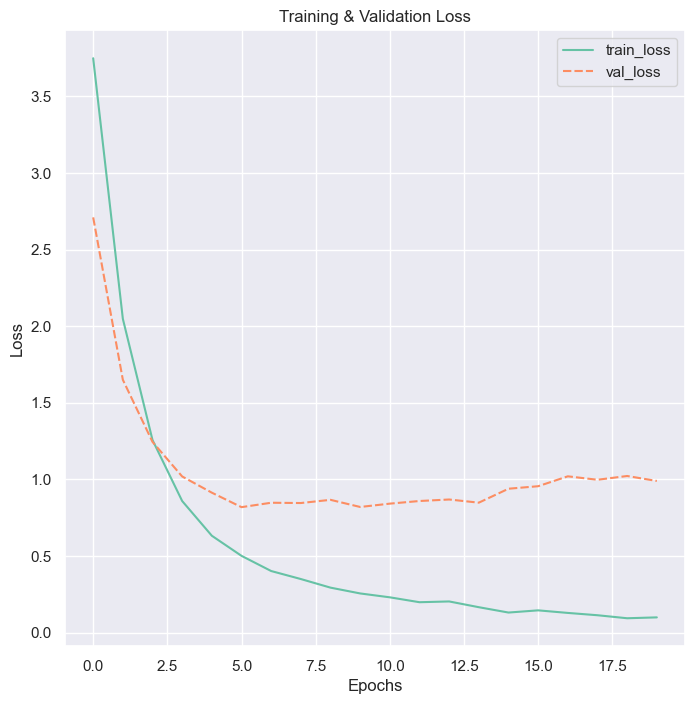

In [103]:
# Plot the training history
f, ax = plt.subplots(figsize=(8, 8))
sns.set_palette('Set2')

sns.lineplot(data=training_history_df[['train_loss', 'val_loss']])
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training & Validation Loss')

plt.show()

We can see that the optimum number of epochs to use is around 13. Around epoch 13 the val_loss start to increase.

In [104]:
# Retrain the model with full training data and the optimum number of epochs
num_epochs = 13
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),       # transform data into dense vectors, easier to work with for model
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),     # utilize Long short-term memory 
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax'),            # 77 neurons, 1 for each unique class, use softmax to return a probability 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=num_epochs, verbose=2)

Epoch 1/13


2024-09-19 15:45:50.791882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-19 15:45:50.792383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-19 15:45:50.792913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 - 5s - loss: 3.7025 - accuracy: 0.0765 - 5s/epoch - 17ms/step
Epoch 2/13
313/313 - 4s - loss: 2.2620 - accuracy: 0.3368 - 4s/epoch - 13ms/step
Epoch 3/13
313/313 - 4s - loss: 1.4566 - accuracy: 0.5683 - 4s/epoch - 14ms/step
Epoch 4/13
313/313 - 4s - loss: 0.9711 - accuracy: 0.7163 - 4s/epoch - 13ms/step
Epoch 5/13
313/313 - 4s - loss: 0.7068 - accuracy: 0.7958 - 4s/epoch - 13ms/step
Epoch 6/13
313/313 - 4s - loss: 0.5564 - accuracy: 0.8365 - 4s/epoch - 13ms/step
Epoch 7/13
313/313 - 4s - loss: 0.4406 - accuracy: 0.8751 - 4s/epoch - 13ms/step
Epoch 8/13
313/313 - 4s - loss: 0.3717 - accuracy: 0.8939 - 4s/epoch - 13ms/step
Epoch 9/13
313/313 - 4s - loss: 0.3028 - accuracy: 0.9141 - 4s/epoch - 13ms/step
Epoch 10/13
313/313 - 4s - loss: 0.2760 - accuracy: 0.9188 - 4s/epoch - 13ms/step
Epoch 11/13
313/313 - 4s - loss: 0.2329 - accuracy: 0.9295 - 4s/epoch - 13ms/step
Epoch 12/13
313/313 - 4s - loss: 0.2196 - accuracy: 0.9375 - 4s/epoch - 13ms/step
Epoch 13/13
313/313 - 4s - loss: 0.1

In [105]:
# Predict 
resutls = model.evaluate(x_test, y_test)

2024-09-19 15:50:08.275990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-19 15:50:08.276679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-19 15:50:08.277353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

97/97 [==============================] - 1s 3ms/step - loss: 0.7791 - accuracy: 0.8182


In [106]:
# Test model on custom input
input_text = ["I am still waiting for my card, when will it arrive?",
                    "Which fiat currency do you support?",
                    "Help, I just lost my card!"]

input_text_arr = np.array(input_text)
input_text_sequences = tokenizer.texts_to_sequences(input_text_arr)
input_text_padded = pad_sequences(input_text_sequences, maxlen=max_length, padding=padding, truncating=truncate)

predictions = model.predict(input_text_padded)
predicted_classes = np.argmax(predictions, axis=1)

2024-09-19 15:53:44.893279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-19 15:53:44.894197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-19 15:53:44.894839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 395ms/step


In [111]:
# Match the categories to their severity levels
train_df['category_codes'] = pd.Categorical(train_df['category']).codes
ref_df = train_df[['category', 'category_codes']]
ref_df = ref_df.drop_duplicates()
ref_df = ref_df.reset_index(drop=True)

predicted_categories = []

for x in predicted_classes:
    target_code = x
    category = ref_df[ref_df['category_codes'] == target_code]['category'].values[0]
    predicted_categories.append(category)

In [114]:
severity_df = pd.read_csv('./data/severity_levels.csv')
for x in predicted_categories:
    target_index = severity_df[severity_df['category'] == x].index.values[0]
    level = severity_df._get_value(target_index, 'severity_level')
    print('Predicted Category:', x)
    print('Severity Level:', level)
    print('\n')

Predicted Category: card_arrival
Severity Level: Medium


Predicted Category: fiat_currency_support
Severity Level: Low


Predicted Category: lost_or_stolen_card
Severity Level: High


